![1주차1번](https://github.com/km0313/q.t-marketmicrostructure-Market-Liquidity-Theory-evidence-policy-quiz-solution/blob/main/1%EC%A3%BC%EC%B0%A81%EB%B2%88.jpg?raw=True)

![1주차2번](https://github.com/km0313/q.t-marketmicrostructure-Market-Liquidity-Theory-evidence-policy-quiz-solution/blob/main/1%EC%A3%BC%EC%B0%A82%EB%B2%88.jpg?raw=True)

![1주차2번-2](https://github.com/km0313/q.t-marketmicrostructure-Market-Liquidity-Theory-evidence-policy-quiz-solution/blob/main/1%EC%A3%BC%EC%B0%A82%EB%B2%88-2.jpg?raw=True)

![1주차4번](https://github.com/km0313/q.t-marketmicrostructure-Market-Liquidity-Theory-evidence-policy-quiz-solution/blob/main/1%EC%A3%BC%EC%B0%A84%EB%B2%88.jpg?raw=True)

![1주차4번-2](https://github.com/km0313/q.t-marketmicrostructure-Market-Liquidity-Theory-evidence-policy-quiz-solution/blob/main/1%EC%A3%BC%EC%B0%A84%EB%B2%88-2.jpg?raw=True)

1주차 5번

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import xlrd


In [2]:
agf=pd.read_excel('DataSet/Data_Sets_Chapter_2_data_AGF.xls',header=0,skiprows=[0])
agf

,Time,Trade Size (|qt|),Price (pt),Direction (dt),Bid(bt),Ask (at)
0,09:06:04,20,66.70000,-1,66.90,67.00
1,09:06:11,25,66.63600,-1,66.65,66.70
2,09:06:26,18,66.60000,-1,66.60,66.65
3,09:07:18,273,66.41630,-1,66.50,66.55
4,09:07:36,27,66.55000,1,66.15,66.55
...,...,...,...,...,...,...
514,17:22:56,1000,66.74765,1,66.60,66.70
515,17:23:28,1500,66.65000,-1,66.60,66.75
516,17:24:48,47,66.75000,1,66.65,66.75
517,17:24:49,237,66.75000,1,66.65,66.75


In [50]:
agf.columns=(['time','qt','pt','dt','bt','at'])


In [51]:
agf.head()

,time,qt,pt,dt,bt,at
0,09:06:04,20,66.7000,-1,66.90,67.00
1,09:06:11,25,66.6360,-1,66.65,66.70
2,09:06:26,18,66.6000,-1,66.60,66.65
3,09:07:18,273,66.4163,-1,66.50,66.55
4,09:07:36,27,66.5500,1,66.15,66.55


In [52]:
agf['time']='2001-03-26 '+agf['time'].astype(str)
agf['time']=pd.to_datetime(agf['time'])

problem a.

In [53]:
agf['mt']=(agf['at']+agf['bt'])/2
agf['abs_s']=agf['at']-agf['bt']
agf['log_s']=np.log(agf['at'])-np.log(agf['bt'])
agf['rel_s']=2*agf['abs_s']/(agf['at']+agf['bt'])



Text(0, 0.5, 'Spread')

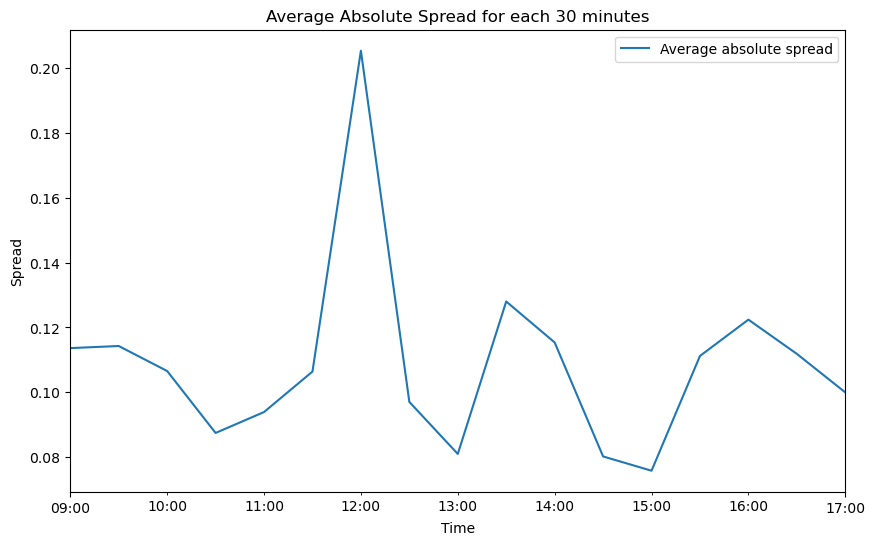

In [54]:
import matplotlib.pyplot as plt
agf['time_bin'] = agf.time.dt.floor('30min')
agf[['time_bin','abs_s']].groupby('time_bin').mean().plot(figsize=(10,6), title='Average Absolute Spread for each 30 minutes')
plt.legend(['Average absolute spread'])
plt.xlabel('Time')
plt.ylabel('Spread')

In [55]:
agf.set_index('time',inplace=True)

problem b.

In [56]:
agf['abs_hs']=agf['dt']*(agf['pt']-agf['mt'])
agf['rel_hs']=agf['abs_hs']/agf['mt']
agf['log_hs']=agf['dt']*(np.log(agf['pt'])-np.log(agf['mt']))
agf.mean()

C:\Users\kangmin\AppData\Local\Temp\ipykernel_3060\4288970701.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  agf.mean()


qt        580.483622
pt         66.016489
dt         -0.055877
bt         65.967245
at         66.073410
mt         66.020328
abs_s       0.106166
log_s       0.001609
rel_s       0.001609
abs_hs      0.059170
rel_hs      0.000897
log_hs      0.000897
dtype: float64

problem c.

In [57]:
from datetime import datetime,timedelta
print(sum(agf['qt']*agf['pt'])/sum(agf['qt']))
agf_1=agf[agf.index<datetime(2001,3,26,12,00,00,00)]
agf_2=agf[(agf.index<datetime(2001,3,26,15,00,00,00)) & (agf.index>=datetime(2001,3,26,12,00,00,00))]
agf_3=agf[(agf.index<datetime(2001,3,26,17,30,00,00)) & (agf.index>=datetime(2001,3,26,15,00,00,00))]

65.97625925897279


In [58]:
sum(agf_1['qt']*agf_1['pt'])/sum(agf_1['qt']),sum(agf_2['qt']*agf_2['pt'])/sum(agf_2['qt']),sum(agf_3['qt']*agf_3['pt'])/sum(agf_3['qt'])

(66.00037952521805, 66.05732484327085, 65.93996300616958)

problem d.

In [59]:
agf['roll_pt']=agf['abs_s']*agf['dt']/2+agf['mt']
agf['rel_roll_s']=(agf['rel_s']*agf['dt']/2)+np.log(agf['mt'])
agf['log_pt']=np.log(agf['pt'])
agf

,qt,pt,dt,bt,at,mt,abs_s,log_s,rel_s,time_bin,abs_hs,rel_hs,log_hs,roll_pt,rel_roll_s,log_pt
time,,,,,,,,,,,,,,,,
2001-03-26 09:06:04,20,66.70000,-1,66.90,67.00,66.950,0.10,0.001494,0.001494,2001-03-26 09:00:00,0.25000,0.003734,0.003741,66.90,4.203199,4.200205
2001-03-26 09:06:11,25,66.63600,-1,66.65,66.70,66.675,0.05,0.000750,0.000750,2001-03-26 09:00:00,0.03900,0.000585,0.000585,66.65,4.199455,4.199245
2001-03-26 09:06:26,18,66.60000,-1,66.60,66.65,66.625,0.05,0.000750,0.000750,2001-03-26 09:00:00,0.02500,0.000375,0.000375,66.60,4.198705,4.198705
2001-03-26 09:07:18,273,66.41630,-1,66.50,66.55,66.525,0.05,0.000752,0.000752,2001-03-26 09:00:00,0.10870,0.001634,0.001635,66.50,4.197202,4.195943
2001-03-26 09:07:36,27,66.55000,1,66.15,66.55,66.350,0.40,0.006029,0.006029,2001-03-26 09:00:00,0.20000,0.003014,0.003010,66.55,4.197958,4.197954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-03-26 17:22:56,1000,66.74765,1,66.60,66.70,66.650,0.10,0.001500,0.001500,2001-03-26 17:00:00,0.09765,0.001465,0.001464,66.70,4.200205,4.200919
2001-03-26 17:23:28,1500,66.65000,-1,66.60,66.75,66.675,0.15,0.002250,0.002250,2001-03-26 17:00:00,0.02500,0.000375,0.000375,66.60,4.198705,4.199455
2001-03-26 17:24:48,47,66.75000,1,66.65,66.75,66.700,0.10,0.001499,0.001499,2001-03-26 17:00:00,0.05000,0.000750,0.000749,66.75,4.200955,4.200954


In [74]:
agf['dp'] = np.log(agf['pt']).diff(1)
agf['dp1'] = agf['dp'].shift(1)
dp = agf[['dp', 'dp1']].dropna()
# roll's estimator
# if the covariance is negative, the estimator is 2*sqrt(-covariance)
# if the covariance is positive, the estimator is nan
def roll_estimator(ts0, ts1):
    if np.cov(ts0, ts1)[0,1] < 0:
        roll = 2*np.sqrt(-np.cov(ts0, ts1)[0,1])
    else :
        roll = np.nan
    return roll
roll_tick = roll_estimator(dp['dp'], dp['dp1'])
dp

,dp,dp1
time,,
2001-03-26 09:06:26,-0.000540,-0.000960
2001-03-26 09:07:18,-0.002762,-0.000540
2001-03-26 09:07:36,0.002011,-0.002762
2001-03-26 09:18:03,-0.004518,0.002011
2001-03-26 09:19:37,-0.000755,-0.004518
...,...,...
2001-03-26 17:22:56,0.002215,0.000000
2001-03-26 17:23:28,-0.001464,0.002215
2001-03-26 17:24:48,0.001499,-0.001464


In [71]:
price_15 = agf.groupby('time_bin')['time_bin', 'pt', 'dt'].tail(1)
print(price_15)
price_15['log_price'] = np.log(price_15['pt'])
price_15['dp'] = price_15['log_price'].diff(1)
price_15['dp1'] = price_15['dp'].shift(1)
dp_15 = price_15[['dp', 'dp1']].dropna()
roll_15 = roll_estimator(dp_15['dp'], dp_15['dp1'])
print('roll estimator', roll_15)

                               time_bin        pt  dt
time                                                 
2001-03-26 09:26:26 2001-03-26 09:00:00  66.20000   1
2001-03-26 09:59:48 2001-03-26 09:30:00  66.15000   1
2001-03-26 10:27:06 2001-03-26 10:00:00  65.90000   1
2001-03-26 10:59:16 2001-03-26 10:30:00  65.50000  -1
2001-03-26 11:29:50 2001-03-26 11:00:00  66.30000   1
2001-03-26 11:59:37 2001-03-26 11:30:00  66.00000  -1
2001-03-26 12:28:13 2001-03-26 12:00:00  66.00000  -1
2001-03-26 12:59:52 2001-03-26 12:30:00  66.19964   1
2001-03-26 13:29:03 2001-03-26 13:00:00  65.80000   1
2001-03-26 13:58:19 2001-03-26 13:30:00  66.10000  -1
2001-03-26 14:29:25 2001-03-26 14:00:00  66.00000  -1
2001-03-26 14:59:00 2001-03-26 14:30:00  66.25000   1
2001-03-26 15:29:25 2001-03-26 15:00:00  66.10000  -1
2001-03-26 15:59:39 2001-03-26 15:30:00  65.70000   1
2001-03-26 16:26:58 2001-03-26 16:00:00  65.95000  -1
2001-03-26 16:59:36 2001-03-26 16:30:00  65.70433  -1
2001-03-26 17:24:59 2001-03-

C:\Users\kangmin\AppData\Local\Temp\ipykernel_3060\1188312322.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_15 = agf.groupby('time_bin')['time_bin', 'pt', 'dt'].tail(1)


problem e.

In [75]:
agf['mt']=np.log(agf['mt'])
agf_15T_mt=agf.resample('15T').last()['mt']-agf.resample('15T').first()['mt']
agf_15T_mt

time
2001-03-26 09:00:00   -0.009002
2001-03-26 09:15:00   -0.003021
2001-03-26 09:30:00   -0.002271
2001-03-26 09:45:00    0.002651
2001-03-26 10:00:00   -0.001134
2001-03-26 10:15:00   -0.006450
2001-03-26 10:30:00   -0.000381
2001-03-26 10:45:00   -0.001525
2001-03-26 11:00:00    0.000381
2001-03-26 11:15:00    0.011004
2001-03-26 11:30:00    0.003390
2001-03-26 11:45:00   -0.006414
2001-03-26 12:00:00   -0.003410
2001-03-26 12:15:00    0.006433
2001-03-26 12:30:00   -0.001885
2001-03-26 12:45:00   -0.003776
2001-03-26 13:00:00   -0.002269
2001-03-26 13:15:00   -0.003414
2001-03-26 13:30:00    0.002278
2001-03-26 13:45:00    0.003784
2001-03-26 14:00:00   -0.000758
2001-03-26 14:15:00    0.000379
2001-03-26 14:30:00    0.000379
2001-03-26 14:45:00    0.002268
2001-03-26 15:00:00   -0.001133
2001-03-26 15:15:00   -0.000378
2001-03-26 15:30:00   -0.001513
2001-03-26 15:45:00   -0.005315
2001-03-26 16:00:00    0.005311
2001-03-26 16:15:00    0.000379
2001-03-26 16:30:00    0.000757
200

In [61]:
#agf['dt'].apply(lambda x: 0 if x==-1 else x).resample('15T').sum().cumsum()/agf['dt'].resample('15T').count().cumsum()

In [76]:
agf_15T_oi=agf.resample('15T').apply(lambda df,a,b,c:sum(df[a]*df[b]*df[c]),'qt','pt','dt' )
agf_15T_oi

time
2001-03-26 09:00:00   -2.053350e+04
2001-03-26 09:15:00    2.873725e+04
2001-03-26 09:30:00   -1.273585e+05
2001-03-26 09:45:00    1.260441e+05
2001-03-26 10:00:00    1.418119e+05
2001-03-26 10:15:00   -1.648993e+05
2001-03-26 10:30:00   -1.921393e+05
2001-03-26 10:45:00   -1.981680e+05
2001-03-26 11:00:00    1.279013e+05
2001-03-26 11:15:00    1.824084e+05
2001-03-26 11:30:00    5.060963e+05
2001-03-26 11:45:00   -2.898977e+05
2001-03-26 12:00:00    2.179553e+05
2001-03-26 12:15:00    2.363121e+05
2001-03-26 12:30:00    4.077990e+04
2001-03-26 12:45:00   -2.362265e+04
2001-03-26 13:00:00   -4.783892e+05
2001-03-26 13:15:00   -2.281795e+05
2001-03-26 13:30:00    3.982025e+05
2001-03-26 13:45:00    1.435095e+04
2001-03-26 14:00:00   -1.004451e+05
2001-03-26 14:15:00    3.748384e+05
2001-03-26 14:30:00   -1.913421e+05
2001-03-26 14:45:00    3.328608e+05
2001-03-26 15:00:00   -6.354565e+04
2001-03-26 15:15:00    2.346378e+05
2001-03-26 15:30:00   -1.302566e+06
2001-03-26 15:45:00   -

In [77]:
b2=sum((agf_15T_mt-agf_15T_mt.mean())*(agf_15T_oi-agf_15T_oi.mean()))/sum((agf_15T_oi-agf_15T_oi.mean())*(agf_15T_oi-agf_15T_oi.mean()))
b2

3.608143520800463e-09

In [78]:
b1=sum(agf_15T_mt)-b2*sum(agf_15T_oi)
b1

0.005612076208915635